### GRIP : The Spark Foundation - INTERNSHIP November-2021

##### Data Science and Business Analytics Intern

##### Author : Abhishek Chakraborty

##### TASK 1 : Prediction Using Supervised ML

###### In this task we have to predict percentage course of a student based on the number of hours of studied. The task has two variable where the feature is the number of hours studied and the target value is the percentage score. This can bw solve using simple linear regression.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
#reading the dataset with its url
data_url=('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df=pd.read_csv(data_url)
df_copy=df.copy()

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#checking the shape 
df.shape

(25, 2)

In [5]:
#chekcing the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#checking the missing value
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
#getting the overview of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


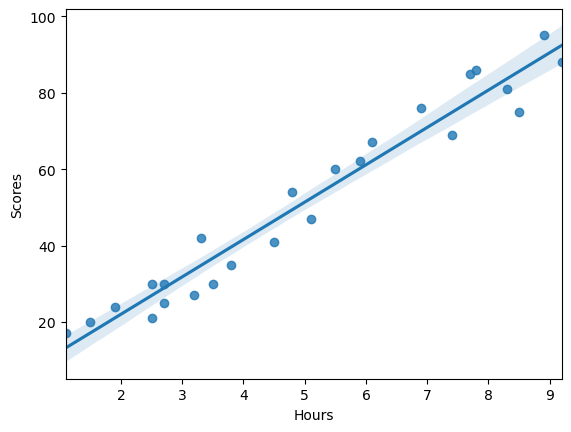

In [8]:
#plotting scatter plot, where X axis will be no.of hours studied and Y axis will be the Score
sns.regplot(x="Hours", y="Scores", data=df);

inference:
as we can see in the scatter plot that number of hours spend in studies promi increase the score of a student

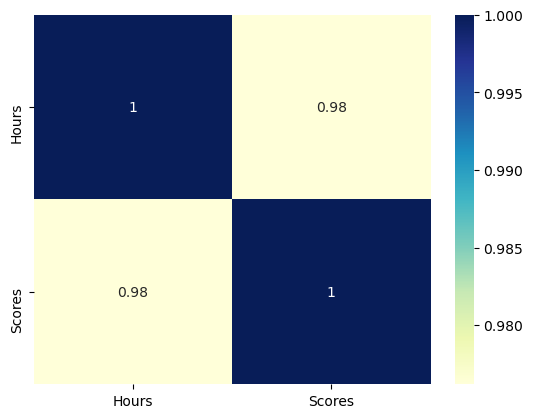

In [9]:
# plotting correlation heatmap
dataplot= sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
plt.show()

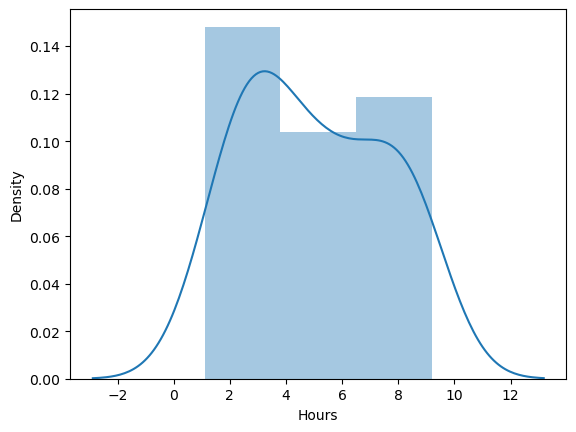

In [10]:
#checking the median score of student
hours=df['Hours']
score=df['Scores']
sns.distplot(hours);

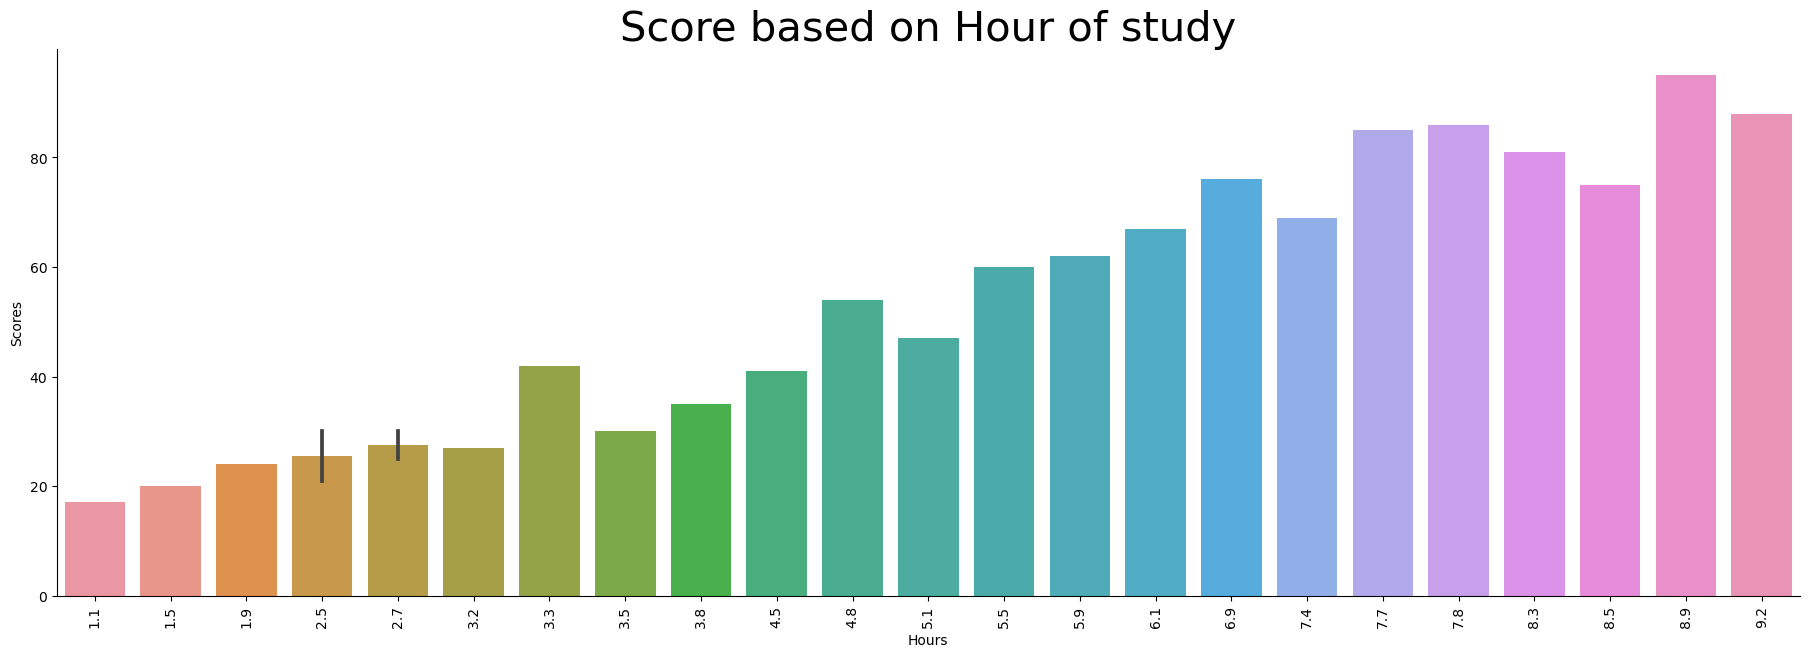

In [11]:
#checking which car brand is more costly at what price range in the market
sns.catplot(y="Scores",x="Hours",data=df.sort_values('Scores',ascending=False),kind="bar",height=6,aspect=3)
plt.title('Score based on Hour of study',fontsize=30)
plt.xticks(rotation ='vertical')
plt.show()

From the above we can see that the score increase as the hours increases.

# Preparing Linear Regression Model.

In [12]:
X=df[['Hours']]
y=df[['Scores']]

In [13]:
#now we will split the data into train and test so we can perfrom with liner model
#importing necessary libries for that
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
#since the data is too small so we are take only 10% of the data for testing for better result

In [107]:
#creating the model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error
from sklearn import metrics
#creating the model variable
reg_model=LinearRegression()

In [111]:
reg_model.fit(X_train,y_train) # this will train our model

LinearRegression()

In [112]:
# Make predictions using the testing set
y_pred = reg_model.predict(X_test)

In [113]:
#now we will run the entire model on whole data set and then we will compare the result
X_whole=df_copy[['Hours']]
y_whole_predict=reg_model.predict(X_whole)

In [114]:
y_pred

array([[27.12998387],
       [27.12998387],
       [69.55836677]])

In [115]:
y_whole_predict

array([[27.12998387],
       [52.20130104],
       [33.87995388],
       [84.98686964],
       [36.77279817],
       [17.48716957],
       [91.73683965],
       [56.05842676],
       [83.05830678],
       [29.05854673],
       [77.27261821],
       [59.91555247],
       [46.41561246],
       [34.84423531],
       [13.63004386],
       [88.84399536],
       [27.12998387],
       [21.34429529],
       [61.84411533],
       [74.37977392],
       [29.05854673],
       [49.30845675],
       [39.66564245],
       [69.55836677],
       [78.23689964]])

# Model Evaluation

#### Calculation of r2 score

R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable(X) which is no.of "Hours" is explained by the independent variable(Y) which is Total Percentage Score, in a regression model.

Higher r2 means better model and vice-versa. 

In [116]:
#calculation of r2
linera_regressionScore=r2_score(y_test,y_pred)
print('Linear Regression R2 Score : ',linera_regressionScore)
print('Linear Regression MSE      : ',metrics.mean_absolute_error(y_test,y_pred))

Linear Regression R2 Score :  0.9498420144567382
Linear Regression MSE      :  5.147211076600418


In our case we got the r2 of 94% aprox which is a good score, for our model to predict the unseen data.

In [117]:
df['y_predict'] = y_whole_predict # making coloumn name y_predict which contain the result
# of all the predicted precentage.

In [118]:
# final result
df.round(2).head()

,Hours,Scores,y_predict
0,2.5,21,27.13
1,5.1,47,52.20
2,3.2,27,33.88
3,8.5,75,84.99
4,3.5,30,36.77


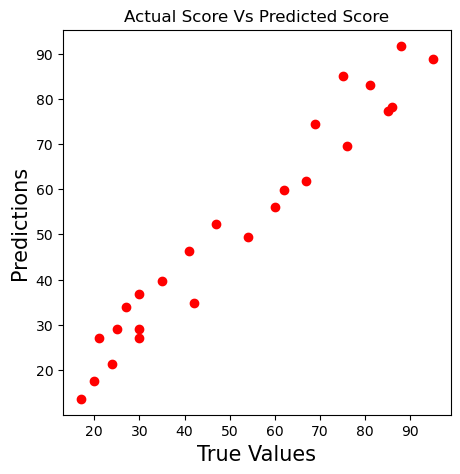

In [119]:
plt.figure(figsize=(5,5))
plt.scatter(df['Scores'],y_whole_predict, c='red')
plt.title('Actual Score Vs Predicted Score')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### what would be the score of a student if he studies for 9.25 hours?

In [120]:
final_predict=reg_model.predict([[9.25]])
print('If the student studies for 9.25hr a day then the Score will be',
      final_predict,'% in exam')

If the student studies for 9.25hr a day then the Score will be [[92.21898036]] % in exam
